In [1]:
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings('ignore')

In [7]:
def classification_building(df, label_name, data_name='main_preproc_text'):
    
    print(label_name)
    
    X = df[data_name]
    y = df[label_name]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100)

    print('train')
    sns.countplot(y_train)
    plt.show()

    print('test')
    sns.countplot(y_test)
    plt.show()


    pipeline = Pipeline([
        ('vect', TfidfVectorizer()),
        ('model',SGDClassifier(n_jobs=-1))])
    
   
    params={'model__loss':[ 'hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
            'model__penalty':['l1','l2'], 
            'vect__ngram_range':[(1, 1), (1, 2)], 
            'model__class_weight':[{0:1, 1:1}, {0:2, 1:1}, {0:3, 1:2}]}

    grid = GridSearchCV(pipeline, cv=3, n_jobs=-1, param_grid=params)
    grid.fit(X_train, y_train)
    model_best = grid.best_estimator_
    print(model_best)
    predicted = model_best.predict(X_test)
    print('accuracy:', metrics.accuracy_score(predicted, y_test))
    print('\n')
    print(metrics.classification_report(y_test, predicted))
    model_best.fit(X, y)
    
    
    # значимые слова
    df_fi = pd.DataFrame(model_best.named_steps['model'].coef_.T)
    df_fi = df_fi.rename(columns={c:'coef_' + str(c) for c in df_fi.columns})
    df_fi.index = model_best.named_steps['vect'].get_feature_names()
    df_fi = df_fi.sort_values(by = list(df_fi.columns), ascending =False)
    print(len(df_fi))    
    fi_keys = []
    for col in df_fi.columns:
        fi_col = df_fi[col].sort_values(ascending =False)[:10]
        keywords = df_fi.index.values
        fi_keys.append({'label':col.split('_')[1], 'keywords':keywords})
        print(col)
        print(fi_col)
        print('\n')
    df_fi_keys = pd.DataFrame(fi_keys)    
    return model_best, df_fi_keys

In [8]:
df = pd.read_csv('VKR_docs_structure.csv')
df['dict_sections_texts'] = df['dict_sections_texts'].map(eval)
df = df[['title', 'main_preproc_text']]
print('Количество текстов:', len(df))
df.head(2)

Количество текстов: 359


,title,main_preproc_text
0,Анализ психологических типов сотрудников для м...,федеральный государственный автономный образов...
1,Исследование влияния алгоритма стохастического...,автор бахтияров алина шамильевич фамилия имя о...


In [9]:
page_names = ['наличие целей', 'наличие задач', 'наличие во введение цели и задач',
                  'соответствие темы работы направлению', 'соответствие введения заданной теме',
                  'наличие актуальности во введении', 
                  'наличие обоснования актуальности во введении']
lst_page_names = ['page0', 'page1', 'page2', 'page3', 'page4', 'page5', 'page6']   

dict_page_names = {k:v for k, v in zip(lst_page_names, page_names)}
dict_page_names

{'page0': 'наличие целей',
 'page1': 'наличие задач',
 'page2': 'наличие во введение цели и задач',
 'page3': 'соответствие темы работы направлению',
 'page4': 'соответствие введения заданной теме',
 'page5': 'наличие актуальности во введении',
 'page6': 'наличие обоснования актуальности во введении'}

In [10]:
dict_page_names.pop('page2')
dict_page_names.pop('page3')
dict_page_names.pop('page4')

'соответствие введения заданной теме'

page_name: page0 наличие целей
len(df_lab) 327
1


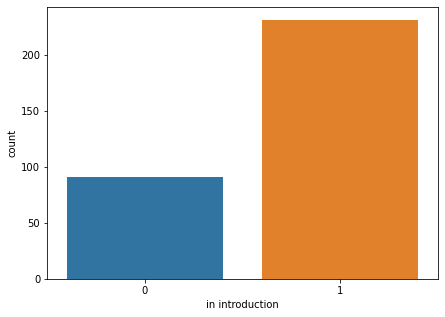

in introduction
train


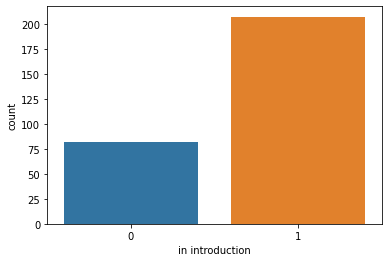

test


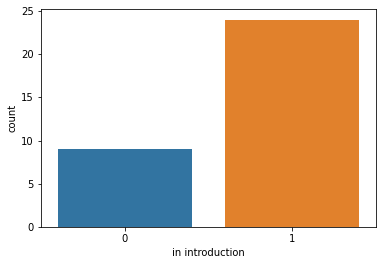

Pipeline(steps=[('vect', TfidfVectorizer(ngram_range=(1, 2))),
                ('model',
                 SGDClassifier(class_weight={0: 3, 1: 2}, loss='squared_hinge',
                               n_jobs=-1, penalty='l1'))])
accuracy: 0.6666666666666666


              precision    recall  f1-score   support

           0       0.42      0.56      0.48         9
           1       0.81      0.71      0.76        24

    accuracy                           0.67        33
   macro avg       0.61      0.63      0.62        33
weighted avg       0.70      0.67      0.68        33

589691
coef_0
блокчейн                1.015258e+13
пакетный предложение    1.013078e+13
кобылий                 1.002864e+13
квас                    9.681628e+12
ставка                  8.220342e+12
редуктор                7.902704e+12
кобылий молоко          7.800052e+12
дрожжи                  7.724541e+12
билет                   7.062194e+12
сборка                  6.989045e+12
Name: coef_0, dtype: float64



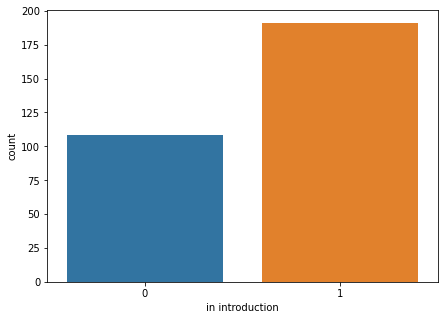

in introduction
train


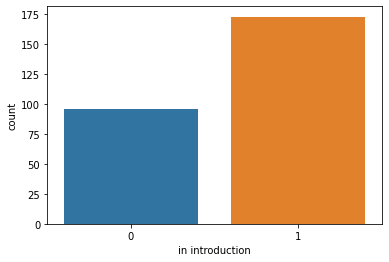

test


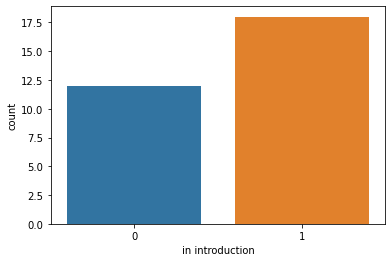

Pipeline(steps=[('vect', TfidfVectorizer(ngram_range=(1, 2))),
                ('model', SGDClassifier(class_weight={0: 1, 1: 1}, n_jobs=-1))])
accuracy: 0.6666666666666666


              precision    recall  f1-score   support

           0       0.62      0.42      0.50        12
           1       0.68      0.83      0.75        18

    accuracy                           0.67        30
   macro avg       0.65      0.62      0.62        30
weighted avg       0.66      0.67      0.65        30

561721
coef_0
сыр                   2.204398
отзыв                 2.196869
жалоба                1.839882
динамический стенд    1.838110
уведомление           1.799590
рассылка              1.701150
поле                  1.684945
овсяный               1.661199
абтест                1.654087
железо                1.642491
Name: coef_0, dtype: float64




___________________________________________________________________________________________________________


-------------------------------

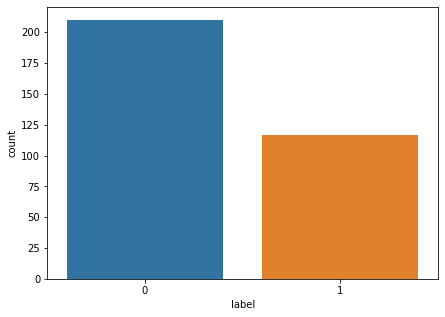

label
train


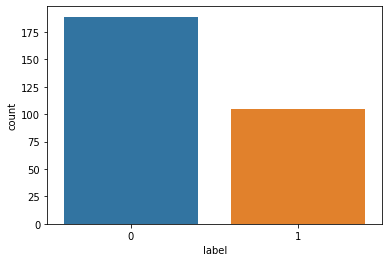

test


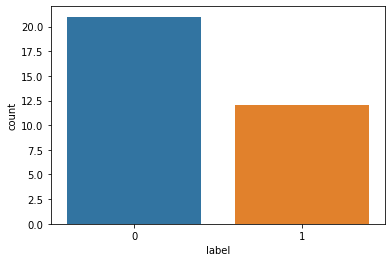

Pipeline(steps=[('vect', TfidfVectorizer(ngram_range=(1, 2))),
                ('model',
                 SGDClassifier(class_weight={0: 1, 1: 1}, loss='log',
                               n_jobs=-1))])
accuracy: 0.7272727272727273


              precision    recall  f1-score   support

           0       0.77      0.81      0.79        21
           1       0.64      0.58      0.61        12

    accuracy                           0.73        33
   macro avg       0.70      0.70      0.70        33
weighted avg       0.72      0.73      0.72        33

597754
coef_0
сеть           3.160413
сигнатура      3.076125
напиток        3.052048
трафик         2.733179
ученик         2.720061
информация     2.560162
шоколад        2.514080
защита         2.496753
сыр            2.491699
калькулятор    2.463380
Name: coef_0, dtype: float64




___________________________________________________________________________________________________________


-----------------------------------------

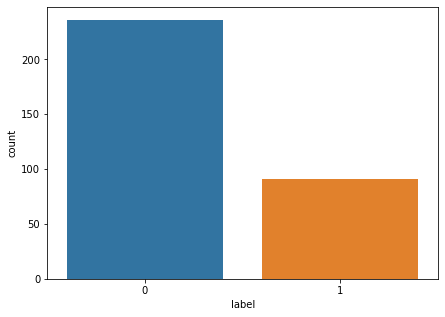

label
train


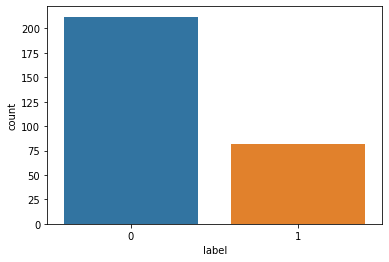

test


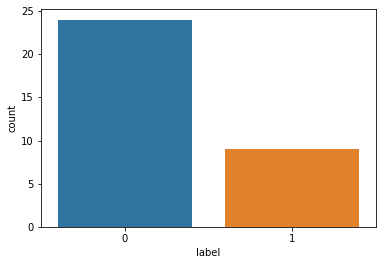

Pipeline(steps=[('vect', TfidfVectorizer(ngram_range=(1, 2))),
                ('model',
                 SGDClassifier(class_weight={0: 3, 1: 2}, loss='log',
                               n_jobs=-1))])
accuracy: 0.696969696969697


              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.43      0.33      0.38         9

    accuracy                           0.70        33
   macro avg       0.60      0.58      0.59        33
weighted avg       0.68      0.70      0.68        33

597754
coef_0
трафик             4.633430
шоколад            4.172173
сеть               4.125136
отход              3.779708
сыр                3.673662
калькулятор        3.572363
менеджер пароль    3.507898
магнитный          3.353770
нефть              3.195887
квас               3.171783
Name: coef_0, dtype: float64




___________________________________________________________________________________________________________


--

In [11]:
%%time
dict_results = {}
for page in dict_page_names:
    pn = dict_page_names[page]
    print('page_name:', page,  pn)
    df_lab = pd.read_excel('ProblemsLabelling.xlsx', sheet_name=page)
    drop_cols = list(set(df_lab.columns) & set(['id', 'path_doc', 'faculty', 'department', 'in paper', 'in annotation']))
    df_lab = df_lab.dropna(axis=1).drop(columns=drop_cols)
    df_lab = df_lab.merge(df[['title', 'main_preproc_text']]).drop_duplicates().dropna()
    print('len(df_lab)', len(df_lab))
    
    label_names = df_lab.drop(columns = ['title', 'main_preproc_text']).columns
    print(len(label_names))
    for label_name in label_names:
        plt.figure(figsize=(7,5))
        df_lab = df_lab[df_lab[label_name].isin([0, 1])]
        sns.countplot(df_lab[label_name])
        plt.show()
        
        model_best, df_fi_keys = classification_building(df = df_lab, label_name = label_name, data_name='main_preproc_text')
        dict_results[pn] = {'model_best':model_best, 'df_fi_keys':df_fi_keys}
        joblib.dump(dict_results, 'dict_results.jbl')
        print('\n')
        print('___________________________________________________________________________________________________________')
        print('\n')
    print('---------------------------------------------------------------------------------')